**Birth Rate Analysis**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
df=pd.read_csv("/content/births.csv")

In [53]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


**Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.**

In [54]:
# Function to calculate decade
def calculate_decade(year):
    return int(year / 10) * 10

# Apply the function to create the new 'Decade' column
df['decade'] = df['year'].apply(calculate_decade)

In [55]:
df

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


**Q.2: Show the descriptive statistics of the data.**

In [56]:
descriptive_stats = df.describe(include='all')
# Print the descriptive statistics
print(descriptive_stats)

                year         month           day gender         births  \
count   15547.000000  15547.000000  15067.000000  15547   15547.000000   
unique           NaN           NaN           NaN      2            NaN   
top              NaN           NaN           NaN      F            NaN   
freq             NaN           NaN           NaN   7776            NaN   
mean     1979.037435      6.515919     17.769894    NaN    9762.293561   
std         6.728340      3.449632     15.284034    NaN   28552.465810   
min      1969.000000      1.000000      1.000000    NaN       1.000000   
25%      1974.000000      4.000000      8.000000    NaN    4358.000000   
50%      1979.000000      7.000000     16.000000    NaN    4814.000000   
75%      1984.000000     10.000000     24.000000    NaN    5289.500000   
max      2008.000000     12.000000     99.000000    NaN  199622.000000   

              decade  
count   15547.000000  
unique           NaN  
top              NaN  
freq             Na

**Q.3: Check if your data contains any missing values**

In [57]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
day    480
dtype: int64



**Q.4: What is the trend of male & female births every decade?**


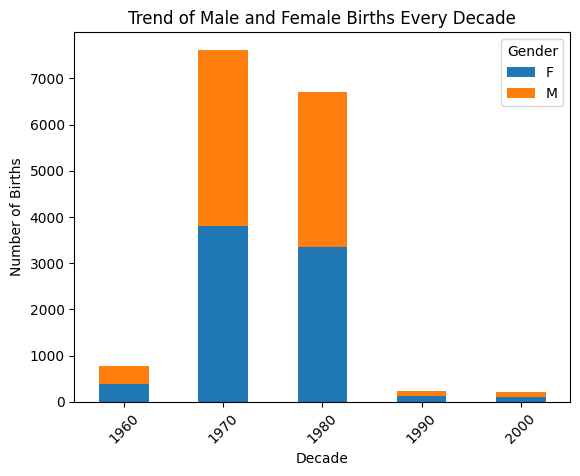

In [58]:
births_per_decade = df.groupby(['decade', 'gender']).size().unstack()

# Step 4: Plot the trend of male and female births
births_per_decade.plot(kind='bar', stacked=True)
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [43]:
df.shape

(15067, 6)

**Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.**

In [59]:
# Step 1: Calculate mean and standard deviation
mean_births = df['births'].mean()
std_dev_births = df['births'].std()

# Step 2: Determine upper and lower bounds
lower_bound = mean_births - 5 * std_dev_births
upper_bound = mean_births + 5 * std_dev_births

# Step 3: Filter the dataset to include only values within bounds
filtered_df = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]

# Print the filtered DataFrame
print(filtered_df)

       year  month  day gender  births  decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15309  1999      2  NaN      F  145172    1990
15357  2001      2  NaN      F  148640    2000
15381  2002      2  NaN      F  148745    2000
15405  2003      2  NaN      F  150278    2000
15453  2005      2  NaN      F  151342    2000

[15086 rows x 6 columns]


**Q.6: Plot births by weekday for several decades. Write down your observation.**


In [60]:
print(df['day'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]


In [61]:
# Filter out '99' from the unique values in the 'day' column
df = df[df['day'] != 99]

# Convert 'year', 'month', and 'day' to datetime format
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Drop rows with NaT (invalid dates)
df = df.dropna(subset=['date'])


/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:1256: RuntimeWarning: invalid value encountered in cast
  masked_result = calc(carg[mask].astype(np.float64).astype(np.int64))
<ipython-input-61-8837da7a872f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')


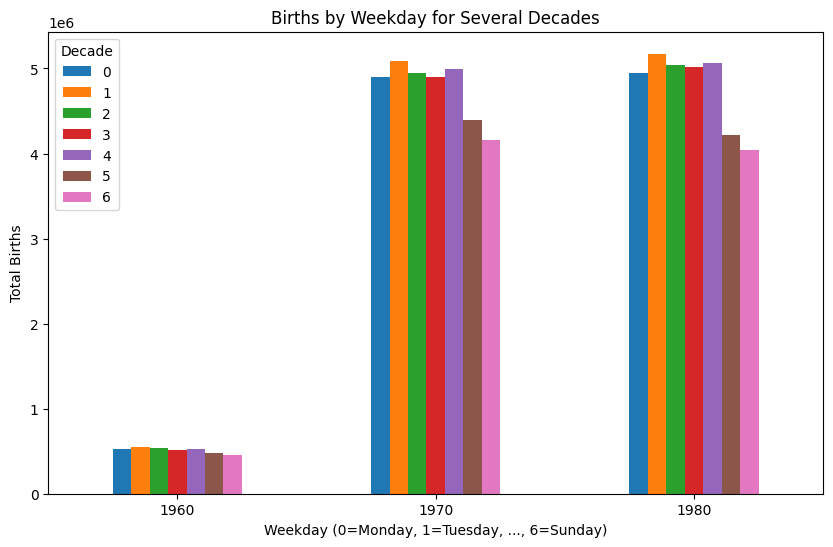

In [62]:

# Extract weekday (Monday=0, Sunday=6)
df['weekday'] = df['date'].dt.dayofweek

# Group by decade and weekday, calculate total births
births_by_weekday_decade = df.groupby(['decade', 'weekday'])['births'].sum().unstack()

# Plot births by weekday for each decade
births_by_weekday_decade.plot(kind='bar', figsize=(10, 6))
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Total Births')
plt.xticks(rotation=0)
plt.legend(title='Decade')
plt.show()

**Q.7: Group the data by month and day separately**

In [63]:
# Group the data by month
births_by_month = df.groupby('month')['births'].sum()

# Group the data by day
births_by_day = df.groupby('day')['births'].sum()


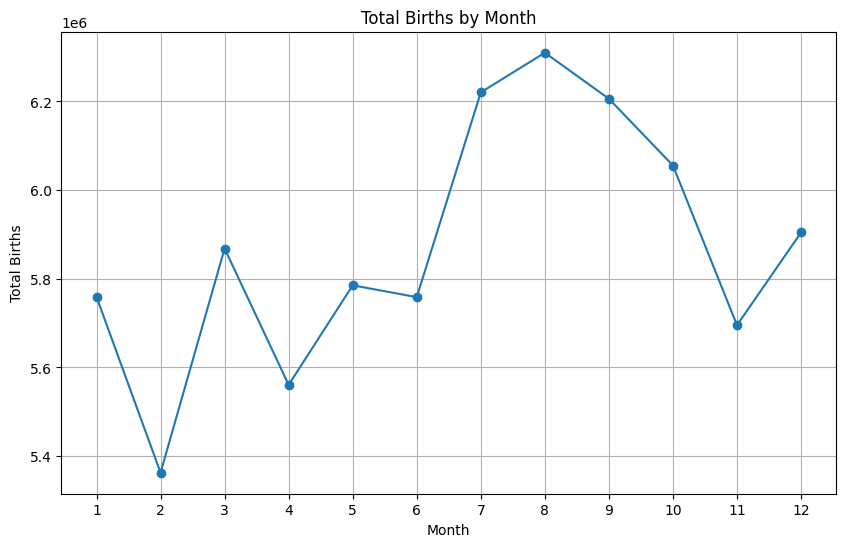

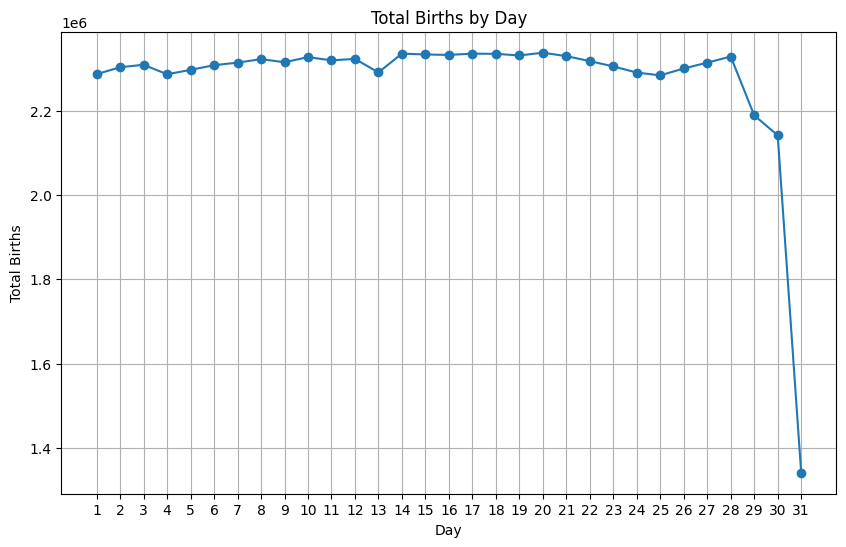

In [65]:
# Plot births by month
plt.figure(figsize=(10, 6))
plt.plot(births_by_month.index, births_by_month.values, marker='o')
plt.title('Total Births by Month')
plt.xlabel('Month')
plt.ylabel('Total Births')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

# Plot births by day
plt.figure(figsize=(10, 6))
plt.plot(births_by_day.index, births_by_day.values, marker='o')
plt.title('Total Births by Day')
plt.xlabel('Day')
plt.ylabel('Total Births')
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()


**Q.8: Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.**

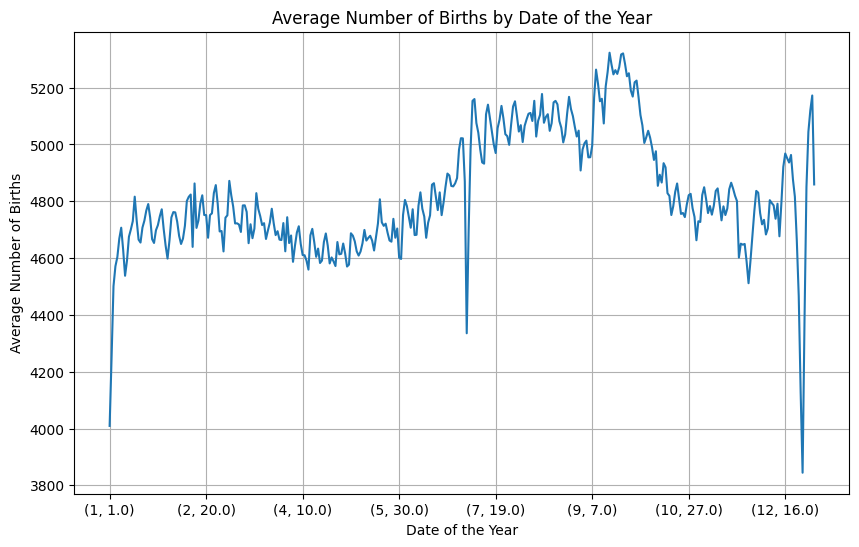

In [68]:

# Drop rows with missing month and day values
df = df.dropna(subset=['month', 'day'])

# Group by month and day, calculate average number of births
average_births_by_date = df.groupby(['month', 'day'])['births'].mean()

# Plot the time series data
average_births_by_date.plot(figsize=(10, 6))
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date of the Year')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.show()
